In [1]:
import pandas as pd
import json
from tqdm import tqdm_notebook
import seaborn as sns
from utils import add_region
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/processados/covid_srag.xlsx"

# Carregando os dados

In [3]:
covid_srag_df = pd.read_excel(PATH) 
covid_srag_df.rename(columns={"Sem_Epi": "semana"}, inplace=True)

In [4]:
covid_srag_df.set_index("semana", inplace=True)

In [5]:
covid_srag_df

,COVID,SRAG_2018,SRAG_2019,SRAG_2020,CovidDeaths,SRAG_Deaths_18,SRAG_Deaths_19,SRAG_Deaths_20
semana,,,,,,,,
11,117,554,943,4470,0,62,84,733
12,973,703,1065,11582,18,78,77,2144
13,2401,799,1128,13873,90,94,95,3326
14,6068,1285,1355,14836,308,150,113,4187
15,9568,1626,1367,17522,644,183,134,5435
16,14719,1960,1552,22098,1138,215,142,7325
17,20310,1896,1564,26846,1583,198,163,9243
18,34358,2111,1718,29894,2509,218,164,10544
19,61487,2009,1773,29300,3620,201,206,9864


In [6]:
for column in covid_srag_df.columns:
    covid_srag_df[column] = covid_srag_df[column].cumsum()

# Casos de coronavirus, SRAG em 2020 e SRAG em 2019

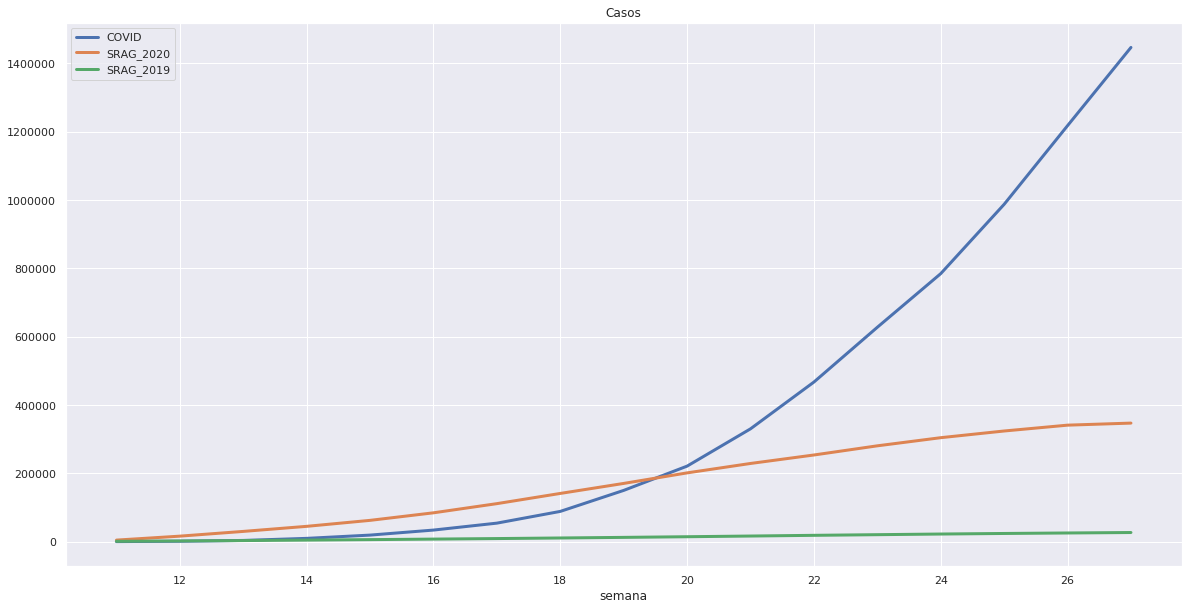

In [7]:
covid_srag_df[["COVID", "SRAG_2020", "SRAG_2019"]].plot(linewidth=3, title="Casos")

# Óbitos de coronavirus, SRAG em 2020 e SRAG em 2019

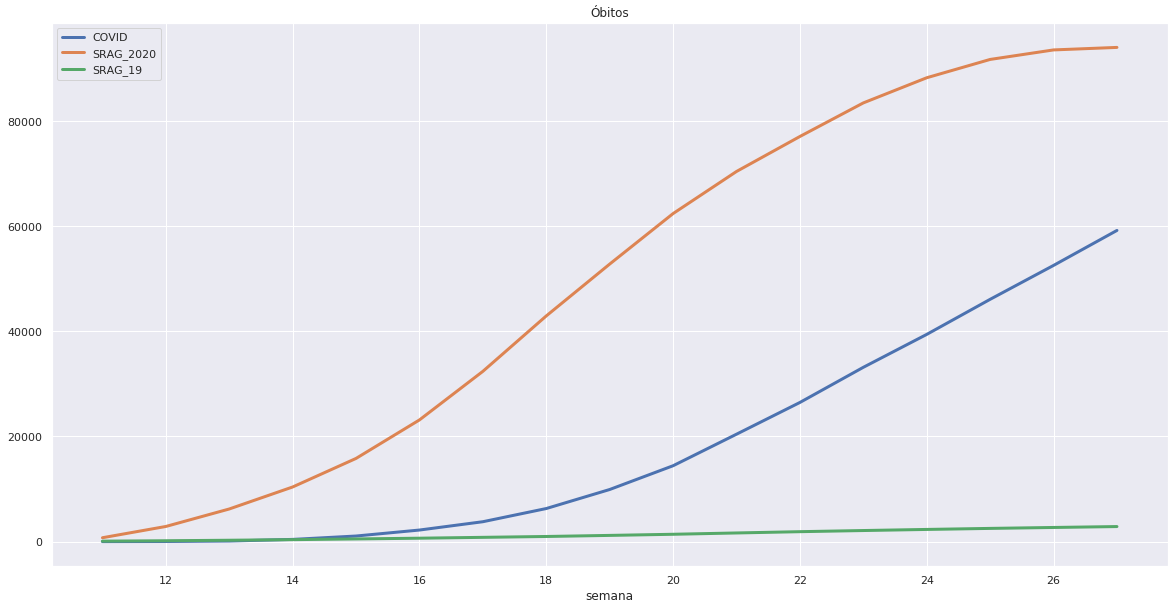

In [8]:
obitos_df = covid_srag_df[["CovidDeaths", "SRAG_Deaths_20", "SRAG_Deaths_19"]]
obitos_df.columns = ["COVID", "SRAG_2020", "SRAG_19"]
obitos_df.plot(linewidth=3, title="Óbitos")

In [9]:
covid_srag_df = covid_srag_df.sort_index(axis=1)

# SRAG entre 2018 e 2020

In [10]:

sns.set(rc={"figure.figsize": (30, 10)})

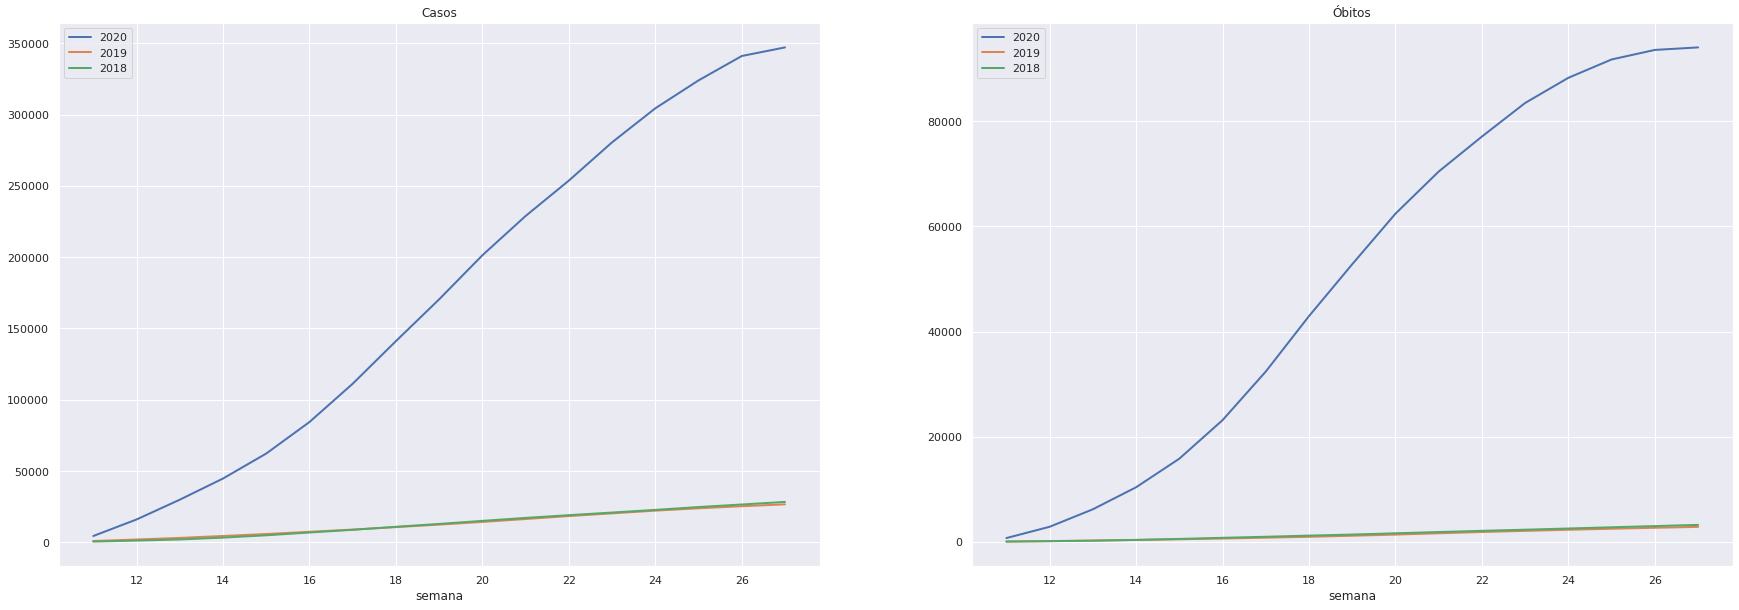

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

labels = ["2020", "2019", "2018"]

casos_df = covid_srag_df[["SRAG_2020", "SRAG_2019", "SRAG_2018"]]
obitos_df = covid_srag_df[["SRAG_Deaths_20", "SRAG_Deaths_19", "SRAG_Deaths_18"]]
casos_df.columns = obitos_df.columns = labels

sns.set(rc={"figure.figsize": (30, 10)})
casos_df.plot(linewidth=2, ax=axes[0], title="Casos")
obitos_df.plot(linewidth=2, ax=axes[1], title="Óbitos")

# Analisando a correlação entre os atributos

In [12]:
sns.set(rc={"figure.figsize": (20, 10)})

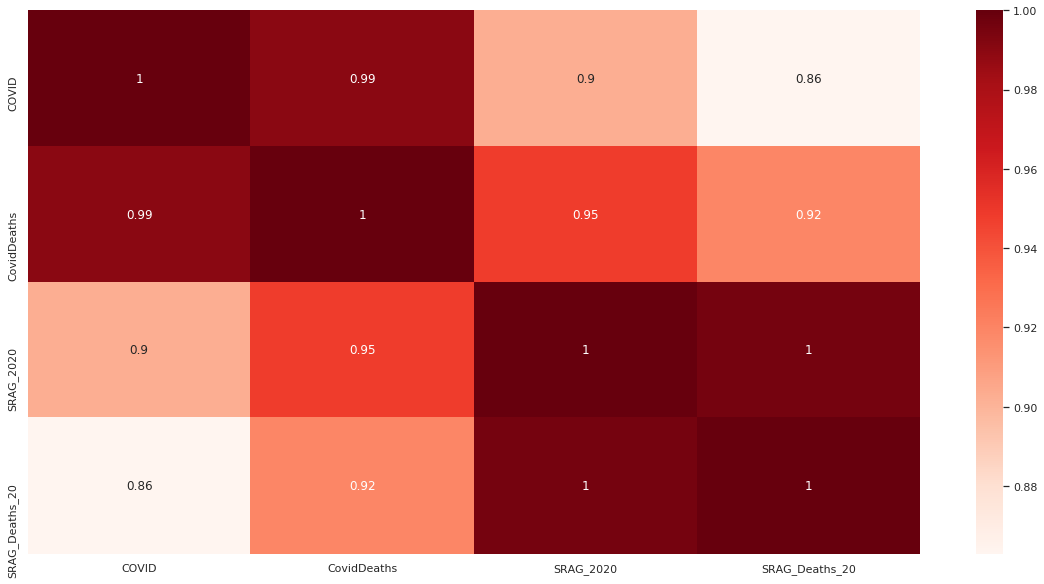

In [13]:
sns.set(rc={"figure.figsize": (20, 10)})
correlation = covid_srag_df.drop(columns=["SRAG_2019", "SRAG_Deaths_19", "SRAG_2018", "SRAG_Deaths_18"]).corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)